## 张昀24210189

本作业主要是生成模拟数据并进行基本的统计分析。我们将生成两个变量x1和x2，
其中x1服从均值为0、标准差为1的正态分布，x2服从均值为3、标准差为1.5的正态分布，
且x1和x2的相关系数为0.4。接下来，我们将对生成的数据进行各种统计分析和可视化。

In [31]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
%pip install numpy pandas

import pandas as pd
import numpy as np

# 生成模拟数据
np.random.seed(189)  # 使用学号后三位作为随机种子
N = 500

# 创建相关矩阵
corr_matrix = np.array([
    [1.0, 0.4],
    [0.4, 1.0]
])

# 生成相关的随机变量
mean = [0, 3]  # x1均值为0，x2均值为3
std = [1, 1.5]  # x1标准差为1，x2标准差为1.5
cov_matrix = np.diag(std) @ corr_matrix @ np.diag(std)  # 计算协方差矩阵

# 生成多元正态分布数据
data = np.random.multivariate_normal(mean, cov_matrix, size=N)
df = pd.DataFrame(data, columns=['x1', 'x2'])

print('数据已成功生成并存储在df中。')
df.head().round(2)

Note: you may need to restart the kernel to use updated packages.
数据已成功生成并存储在df中。


,x1,x2
0,-2.07,0.63
1,0.96,2.61
2,1.44,5.55
3,0.26,4.39
4,-2.53,0.20


### 1. 数据概览

下面展示生成的数据集行数五行内容。

In [25]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
df.head().round(2)

,x1,x2
0,-2.07,0.63
1,0.96,2.61
2,1.44,5.55
3,0.26,4.39
4,-2.53,0.20


从输出结果可以看到，数据框包含两个变量x1和x2，
并且成功生成了500行符合指定正态分布特征的数据。

### 2. 描述性统计

下面计算并展示数据的描述性统计量，包括均值、标准差等。

In [26]:
# 计算描述性统计量
desc_stats = df.describe().transpose()
# 添加中位数
desc_stats['median'] = df.median()
# 添加偏度
desc_stats['skewness'] = df.skew()
# 添加峰度
desc_stats['kurtosis'] = df.kurt()

# 显示结果，保留两位小数
desc_stats.round(2)

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
x1,500.0,0.01,1.01,-3.92,-0.64,-0.02,0.72,3.27,-0.02,-0.15,0.48
x2,500.0,2.92,1.44,-1.03,1.93,2.84,3.92,7.44,2.84,0.03,-0.25


从描述性统计结果中我们可以看到：
- x1的均值接近0，标准差接近1，符合我们的设定；
- x2的均值接近3，标准差接近1.5，也符合我们的设定；
- 偏度都接近0，说明数据分布接近对称；
- 峰度都接近0，说明数据分布接近正态分布的峰度。

### 3. x1的直方图

下面绘制x1变量的直方图，展示其分布情况。

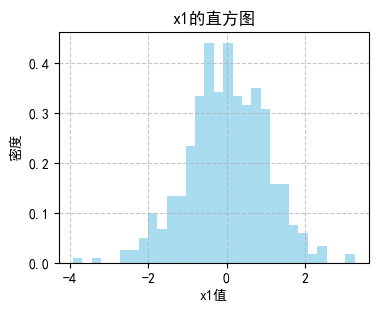

In [27]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
import matplotlib.pyplot as plt

if 'df' not in globals():
	raise NameError("变量df未定义，请先运行生成数据的单元格。")

plt.figure(figsize=(4, 3))
plt.hist(df['x1'], bins=30, density=True, alpha=0.7, color='skyblue')
plt.title('x1的直方图')
plt.xlabel('x1值')
plt.ylabel('密度')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

从直方图可以看出，x1的分布大致呈现正态分布的形状，
中心位置接近0，与我们设定的均值为0相符。

### 4. x1和x2的密度函数图

下面在同一幅图中绘制x1和x2的密度函数图，便于比较两者的分布。

Note: you may need to restart the kernel to use updated packages.


C:\Users\jydf\AppData\Local\Temp\ipykernel_3488\1027012104.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['x1'], shade=True, label='x1', color='skyblue')
C:\Users\jydf\AppData\Local\Temp\ipykernel_3488\1027012104.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['x2'], shade=True, label='x2', color='salmon')


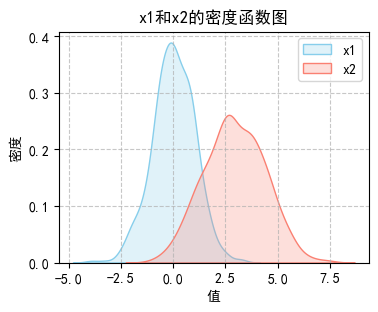

In [29]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
%pip install seaborn

import seaborn as sns

plt.figure(figsize=(4, 3))
# 绘制x1的密度函数
sns.kdeplot(df['x1'], shade=True, label='x1', color='skyblue')
# 绘制x2的密度函数
sns.kdeplot(df['x2'], shade=True, label='x2', color='salmon')
plt.title('x1和x2的密度函数图')
plt.xlabel('值')
plt.ylabel('密度')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

从密度函数图可以清晰地看到：
- x1的分布中心在0附近，x2的分布中心在3附近；
- x2的分布比x1更分散，这是因为x2的标准差(1.5)比x1的标准差(1)大。

### 5. x1和x2的箱线图

下面绘制x1和x2的箱线图，展示数据的分布特征。

C:\Users\jydf\AppData\Local\Temp\ipykernel_3488\1390124645.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['x1'], df['x2']], labels=['x1', 'x2'])


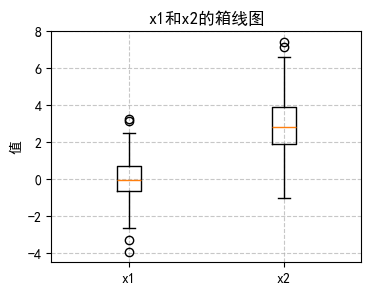

In [21]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
plt.figure(figsize=(4, 3))
plt.boxplot([df['x1'], df['x2']], labels=['x1', 'x2'])
plt.title('x1和x2的箱线图')
plt.ylabel('值')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

从箱线图中我们可以观察到：
- 两个变量的中位数位置与我们设定的均值相符；
- x2的箱体比x1的箱体更宽，说明其数据分布更分散；
- 两个变量都没有明显的离群值。

### 6. x1和x2的小提琴图

下面绘制x1和x2的小提琴图，结合了箱线图和密度图的特点。

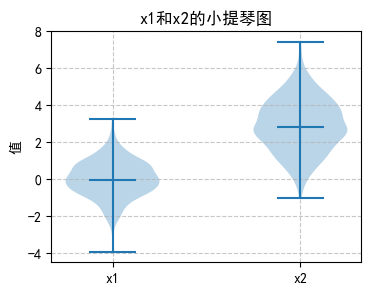

In [22]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
plt.figure(figsize=(4, 3))
plt.violinplot([df['x1'], df['x2']], showmedians=True)
plt.xticks([1, 2], ['x1', 'x2'])
plt.title('x1和x2的小提琴图')
plt.ylabel('值')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

小提琴图结合了箱线图和密度图的特点：
- 中间的白色点表示中位数；
- 较宽的部分表示数据分布较多的区域；
- 从图中可以看出x1和x2都近似正态分布，这与我们的设定一致。

### 7. x1和x2的相关系数

下面计算并展示x1和x2的相关系数。

In [18]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
# 计算相关系数矩阵
correlation = df.corr()

# 显示相关系数，保留两位小数
print('x1和x2的相关系数：')
correlation.round(2)

x1和x2的相关系数：


,x1,x2
x1,1.00,0.41
x2,0.41,1.00


从相关系数矩阵可以看出，x1和x2的相关系数接近0.4，
这与我们设定的相关系数一致，说明模拟数据的相关性符合预期。

### 8. x1和x2的散点图

下面绘制x1和x2的散点图，并添加回归线和置信区间。

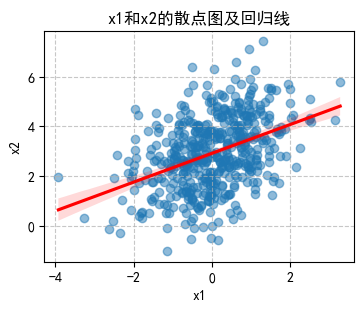

In [23]:
# 设置中文字体（如黑体）
plt.rcParams['font.family'] = ['SimHei', 'DejaVu Sans']  # 优先使用 SimHei，缺失字符时用 DejaVu Sans 补全
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题（用 DejaVu Sans 的负号）
plt.figure(figsize=(4, 3))
# 绘制散点图
sns.regplot(x='x1', y='x2', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('x1和x2的散点图及回归线')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

从散点图和回归线可以看出：
- x1和x2之间存在正相关关系，与我们设定的相关系数为正相符；
- 回归线的斜率和截距反映了两个变量之间的线性关系；
- 灰色区域表示95%置信区间，显示了回归线的不确定性范围。